In [13]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
st=pd.read_csv("Student_Performance.csv")
st.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [16]:
st['Extracurricular_Activities'] = st['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})

In [17]:
st

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
...,...,...,...,...,...,...
9995,1,49,1,4,2,23
9996,7,64,1,8,5,58
9997,6,83,1,8,5,74
9998,9,97,1,7,0,95


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
x_train,x_test=train_test_split(st,train_size=0.8,test_size=0.2,random_state=42)

In [20]:
var=['Hours_Studied','Previous_Scores','Performance_Index','Sleep_Hours','Sample_Question_Papers_Practiced']
x_train[var]=scaler.fit_transform(x_train[var])
x_train.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
9254,0.500,0.152542,0,0.6,0.555556,0.288889
1561,0.125,0.135593,1,0.6,0.666667,0.166667
1670,0.125,0.694915,0,0.6,0.222222,0.544444
6087,0.125,0.101695,0,0.4,0.111111,0.133333
6669,0.875,0.118644,0,1.0,0.000000,0.333333


In [21]:
x=st[['Hours_Studied','Previous_Scores','Extracurricular_Activities','Sleep_Hours','Sample_Question_Papers_Practiced']]
y=st['Performance_Index']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=78)

In [25]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred = model.predict(x_test)

In [27]:
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("R2 value",r2)
print("MSE value",mse)

R2 value 0.9890929146380852
MSE value 4.20058531655297


### visualization

<Axes: xlabel='Performance_Index', ylabel='Density'>

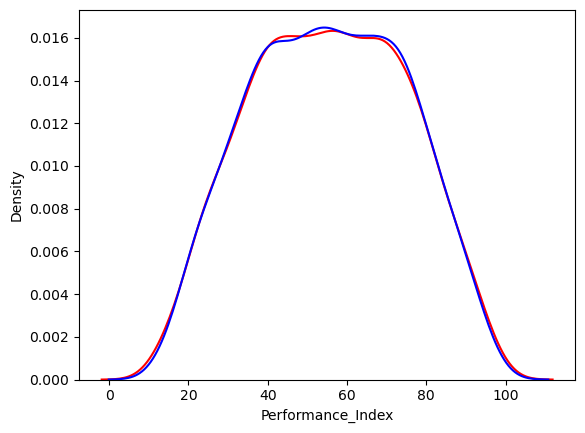

In [28]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" )

In [39]:
new_data = pd.DataFrame([
    {'Hours_Studied':9,'Previous_Scores':93,'Extracurricular_Activities':0,'Sleep_Hours':5,'Sample_Question_Papers_Practiced':4}])
new_data

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced
0,9,93,0,5,4


In [40]:
predicted_price = model.predict(new_data)

In [41]:
print(predicted_price)

[89.43950228]
